<a href="https://colab.research.google.com/github/gmdeorozco/Scikit-Learn-Library/blob/main/MultipleLinearRegressionReplica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving Advertising.csv to Advertising.csv


In [2]:
import pandas as pd
advert = pd.read_csv('Advertising.csv')
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


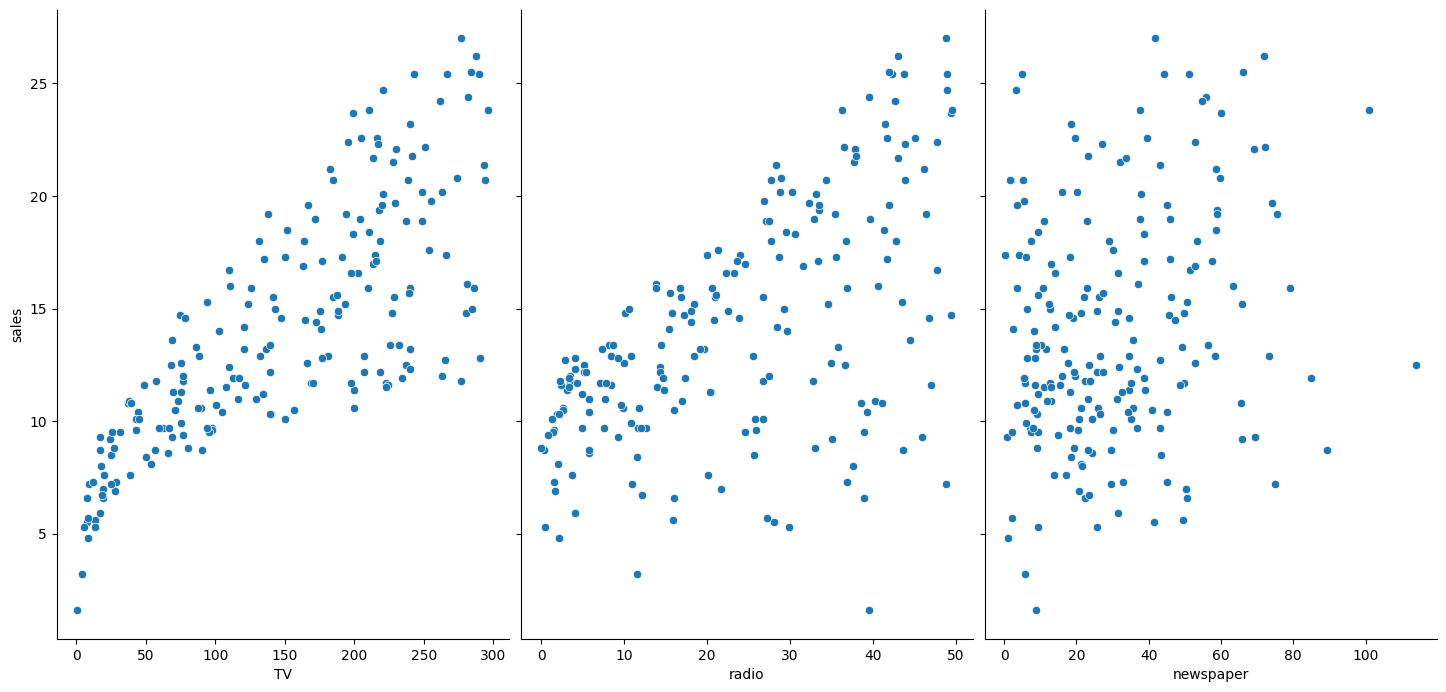

In [4]:
import seaborn as sns
sns.pairplot(advert, x_vars=['TV','radio','newspaper'], y_vars=['sales'], height=7, aspect=0.7)

In [6]:
from sklearn.linear_model import LinearRegression
X = advert[['TV','radio','newspaper']]
y = advert.sales

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
lm1 = LinearRegression().fit(X_train,y_train)
pred = lm1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


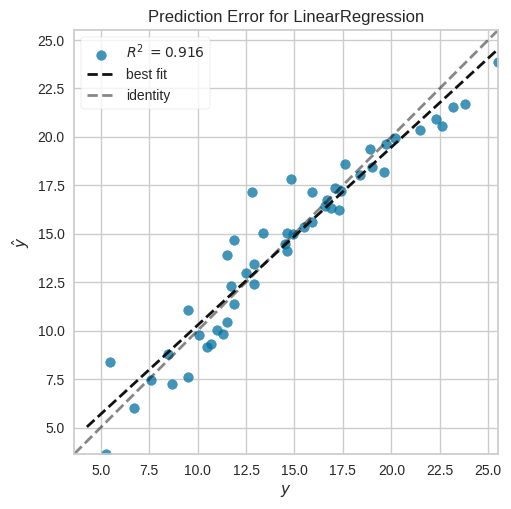

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [7]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm1)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


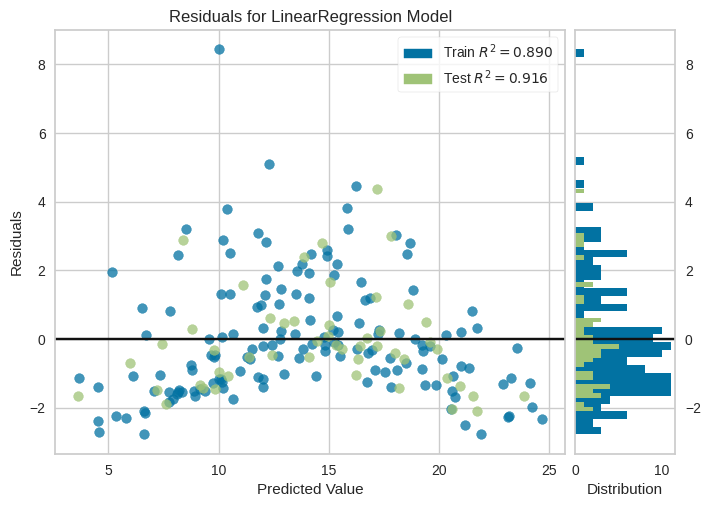

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [8]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm1)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test) 
visualizer.poof()

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MSQE", np.sqrt(mean_squared_error(pred,y_test)))
print("R2", r2_score(pred,y_test))

MSQE 1.404651423032895
R2 0.908443167758155
